In [1]:
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Input, Conv2D, Dense, MaxPooling2D, Flatten
from keras import Model

In [5]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [6]:
class LeNet:
  def __init__(self):
    self.model = None

  # Build architecture of the network
  def build(self, input_dim):
    input = Input(shape=input_dim)

    # Convolution block
    C1 = Conv2D(6, (3, 3), padding="same", activation='relu', use_bias=True)(input)
    S2 = MaxPooling2D(pool_size=(2, 2), strides=2, padding="same")(C1)

    C3 = Conv2D(16, (5, 5), padding="same", activation='relu', use_bias=True)(S2)
    S4 = MaxPooling2D(pool_size=(2, 2), strides=2, padding="same")(C3)

    C4 = Conv2D(16, (5, 5), padding="same", activation='relu', use_bias=True)(S4)
    S5 = MaxPooling2D(pool_size=(2, 2), strides=2, padding="same")(C4)

    # Fully Connected block
    flat = Flatten()(S5) # flatten
    FC5 = Dense(120, activation='relu', use_bias=True)(flat) # fully connected layer
    FC6 = Dense(84, activation='relu', use_bias=True)(FC5)   # fully conected layer
    output = Dense(10, activation='softmax', use_bias=True)(FC6)

    self.model = Model(input, output)
    self.model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
  
  # Train the given architecture with data
  def train(self, x_train, y_train):
    history = self.model.fit(x_train, y_train, batch_size=128, epochs=50, validation_split=0.2, callbacks=[early_stop])
    return history

  def predict(self, x_test):
    return self.model.predict(x_test)

  def summary(self):
    self.model.summary()

  def load(self, model_file):
    self.model = load_model(model_file)

  def save(self, model_file):
    self.model.save(model_file)

In [7]:
# Prepare data
from keras.datasets import mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data
x_train_norm = x_train / 255.0 # Attention here: use 255.0 instead of 255
x_test_norm = x_test / 255.0 

# Convert to one-hot vector
def onehot(y):
  oh = np.zeros((y.shape[0], 10))
  oh[np.arange(y.shape[0]), y] = 1
  return oh

y_train_oh = onehot(y_train)
y_test_oh = onehot(y_test)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Size of input:  (60000, 28, 28)


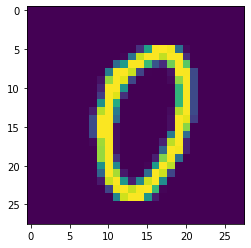

In [8]:
import matplotlib.pyplot as plt

index = 1000
print(y_train_oh[index])
plt.imshow(x_train_norm[index])
print('Size of input: ', x_train_norm.shape)

In [9]:
leNet = LeNet()
leNet.build((28, 28, 1))
leNet.summary()
hist = leNet.train(x_train_norm, y_train_oh)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 6)         60        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 16)          6416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 16)          0     

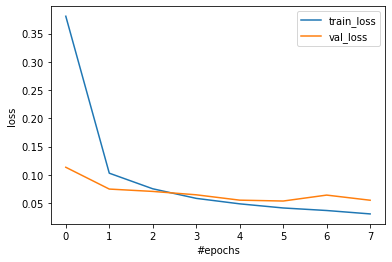

In [10]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['train_loss', 'val_loss'])
plt.xlabel('#epochs')
plt.ylabel('loss')
plt.show()

Predicted label:  0


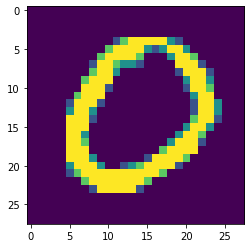

In [11]:
pred = leNet.predict(x_test_norm)
index = 183
print('Predicted label: ', np.argmax(pred[index]))
plt.imshow(x_test_norm[index])

In [25]:
import pandas as pd 
import numpy as np

In [14]:
test_data = pd.read_csv('./digit_recognizer_new/test_new.csv')

In [15]:
test_data.shape

(12600, 784)

In [20]:
test = test_data.values.reshape(12600, 28, 28)

In [21]:
test.shape

(12600, 28, 28)

In [43]:
answer = leNet.predict(test)

In [44]:
answer = np.argmax(answer, axis=1)

In [45]:
df_submission = pd.DataFrame()

In [46]:
df_submission['ImageId'] = [ i for i in range(len(answer))]

In [48]:
answer

array([3, 2, 7, ..., 7, 6, 9])

In [49]:
df_submission['Label'] = answer

In [41]:
df_submission['ImageId'] = [i for i in range(len(df_submission))]

In [50]:
df_submission

,ImageId,Label
0,0,3
1,1,2
2,2,7
3,3,6
4,4,6
...,...,...
12595,12595,0
12596,12596,1
12597,12597,7
12598,12598,6


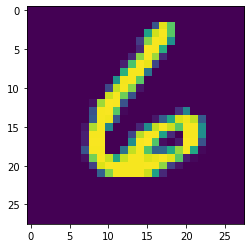

In [67]:
plt.imshow(test[12598])

In [58]:
df_submission.reset_index(drop=True, inplace=True)

In [59]:
df_submission

,ImageId,Label
0,0,3
1,1,2
2,2,7
3,3,6
4,4,6
...,...,...
12595,12595,0
12596,12596,1
12597,12597,7
12598,12598,6


In [63]:
df_submission.to_csv('df_submission.csv', index = False)

In [70]:
submit = pd.read_csv('./digit_recognizer_new/sample_submission_new.csv')

In [73]:
submit['Label'] = answer

In [74]:
submit

,ImageId,Label
0,1,3
1,2,2
2,3,7
3,4,6
4,5,6
...,...,...
12595,12596,0
12596,12597,1
12597,12598,7
12598,12599,6


In [75]:
import math, requests

def submit_prediction(df, sep=',', comment='', compression='gzip', **kwargs):
    TOKEN='6697d5d0d8bca88aef4a185b16493f456e4788f7aace86d0028850b6a744ce365da3d9ff2d890d6e1f7865a2867543ab3ba4ac3225cf1c581c81bc802fae57d4'
    URL='http://submission.mmlab.uit.edu.vn/api/submissions'
    df.to_csv('temporary.dat', sep=sep, compression=compression, **kwargs)
    r = requests.post(URL, headers={'Authorization': 'Bearer {}'.format(TOKEN)},files={'datafile': open('temporary.dat', 'rb')},data={'comment':comment, 'compression': compression})
    if r.status_code == 429:
        raise Exception('Submissions are too close. Next submission is only allowed in {} seconds.'.format(int(math.ceil(int(r.headers['x-rate-limit-remaining']) / 1000.0))))
    if r.status_code != 200:
        raise Exception(r.text)
        
submit_prediction(submit, sep=',', index=True, comment='my submission')